<a href="https://colab.research.google.com/github/anish13-mellam/DAV_Assignment-_193/blob/main/VisualizationwithMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving deepseek_vs_chatgpt.csv to deepseek_vs_chatgpt.csv


In [2]:
import pandas as pd

df = pd.read_csv('deepseek_vs_chatgpt.csv')  # Use the correct file name
df.head()

,Date,Month_Num,Weekday,AI_Platform,AI_Model_Version,Active_Users,New_Users,Churned_Users,Daily_Churn_Rate,Retention_Rate,...,Session_Duration_sec,Device_Type,Language,Response_Accuracy,Response_Speed_sec,Response_Time_Category,Correction_Needed,User_Return_Frequency,Customer_Support_Interactions,Region
0,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,...,40,Mobile,es,0.7842,3.30,Standard,0,6,2,Antarctica (the territory South of 60 deg S)
1,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,...,24,Laptop/Desktop,zh,0.8194,3.28,Standard,1,2,2,Ukraine
2,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,...,34,Mobile,en,0.8090,3.07,Standard,0,2,0,Grenada
3,2024-09-21,9,Saturday,ChatGPT,GPT-4-turbo,500000,25000,25000,0.05,0.95,...,18,Mobile,fr,0.8233,3.06,Standard,0,9,0,Guyana
4,2024-05-16,5,Thursday,DeepSeek,DeepSeek-Chat 1.5,1700000,170000,34000,0.02,0.95,...,10,Mobile,de,0.9366,1.48,Fast,0,9,3,India


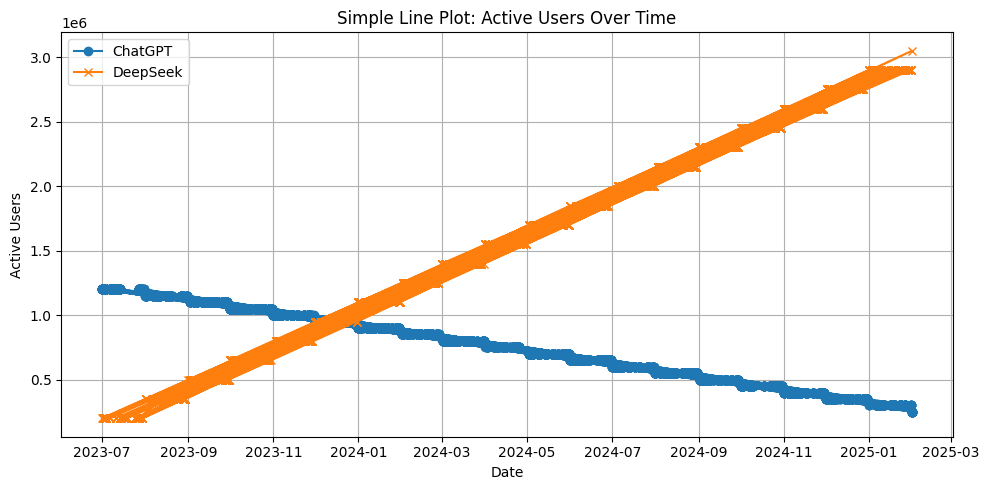

In [3]:
#Simple Line Plot
import matplotlib.pyplot as plt

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Separate data by AI Platform
chatgpt_data = df[df['AI_Platform'] == 'ChatGPT']
deepseek_data = df[df['AI_Platform'] == 'DeepSeek']

# Plot
plt.figure(figsize=(10, 5))
plt.plot(chatgpt_data['Date'], chatgpt_data['Active_Users'], label='ChatGPT', marker='o')
plt.plot(deepseek_data['Date'], deepseek_data['Active_Users'], label='DeepSeek', marker='x')
plt.xlabel("Date")
plt.ylabel("Active Users")
plt.title("Simple Line Plot: Active Users Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


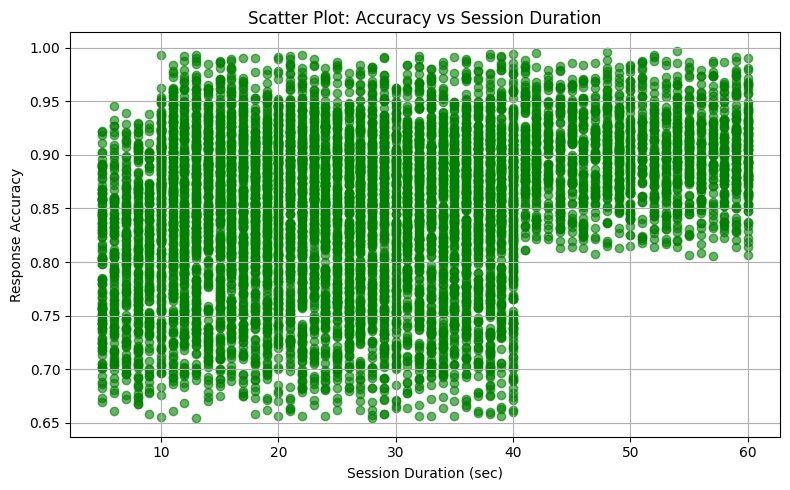

In [7]:
#Scatter Plot
import matplotlib.pyplot as plt

# Scatter plot: Response Accuracy vs Session Duration
plt.figure(figsize=(8, 5))
plt.scatter(df['Session_Duration_sec'], df['Response_Accuracy'], c='green', alpha=0.6)
plt.xlabel("Session Duration (sec)")
plt.ylabel("Response Accuracy")
plt.title("Scatter Plot: Accuracy vs Session Duration")
plt.grid(True)
plt.tight_layout()
plt.show()


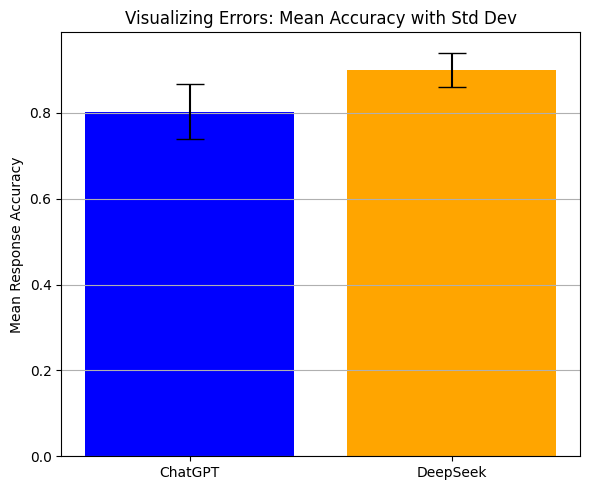

In [8]:
#Visualizing errors
import numpy as np

# Group data to compute mean and standard deviation
grouped = df.groupby('AI_Platform')['Response_Accuracy']
mean_accuracy = grouped.mean()
std_accuracy = grouped.std()

# Error bar plot
plt.figure(figsize=(6, 5))
plt.bar(mean_accuracy.index, mean_accuracy.values, yerr=std_accuracy.values, capsize=10, color=['blue', 'orange'])
plt.ylabel("Mean Response Accuracy")
plt.title("Visualizing Errors: Mean Accuracy with Std Dev")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


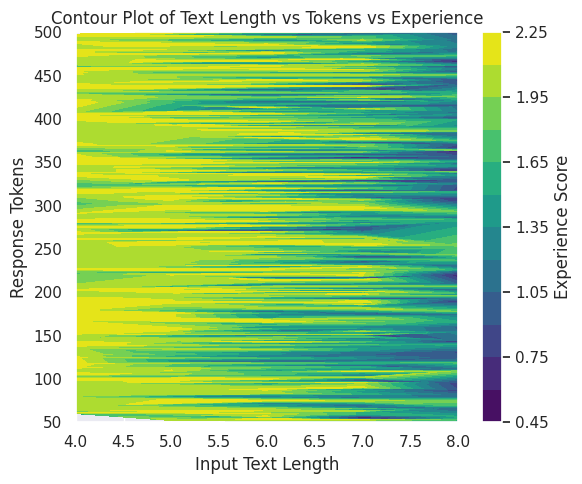

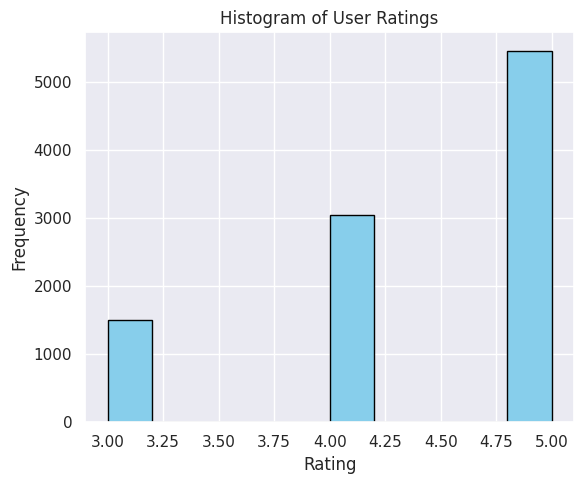

<ipython-input-9-8324ef43befe>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Length_Category', palette="coolwarm")


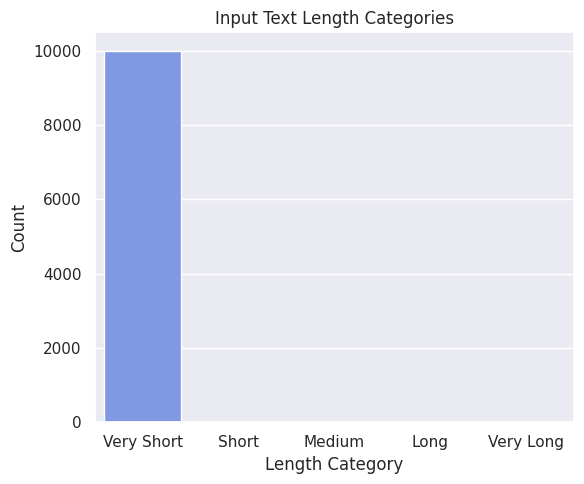

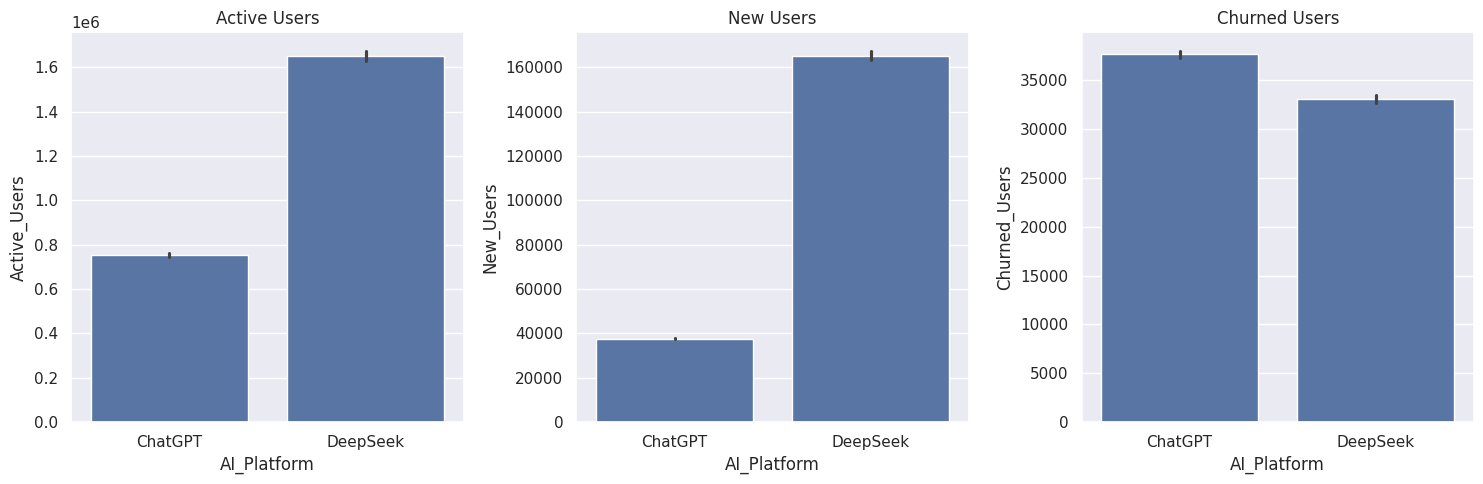

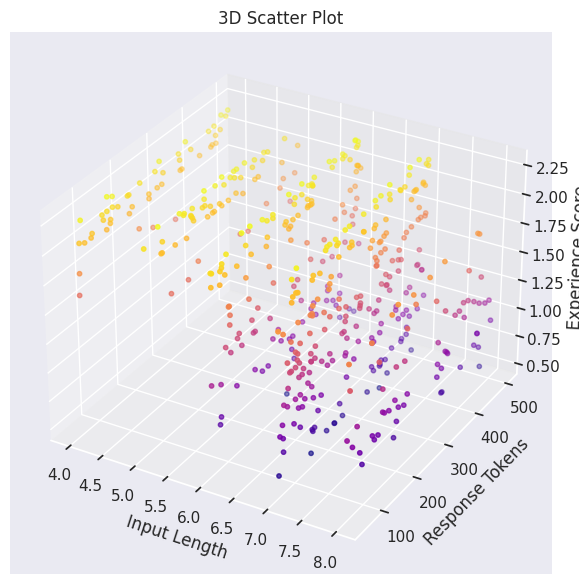

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Set the style for Seaborn
sns.set(style="darkgrid")

# Prepare data for plots
x = df['Input_Text_Length']
y = df['Response_Tokens']
z = df['User_Experience_Score']
platforms = df['AI_Platform'].unique()

#  Contour Plot
plt.figure(figsize=(6, 5))
plt.tricontourf(x[:1000], y[:1000], z[:1000], levels=14, cmap="viridis")
plt.colorbar(label='Experience Score')
plt.title("Contour Plot of Text Length vs Tokens vs Experience")
plt.xlabel("Input Text Length")
plt.ylabel("Response Tokens")
plt.tight_layout()
plt.show()

#  Histogram
plt.figure(figsize=(6, 5))
plt.hist(df['User_Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#  Binning Input_Text_Length into categories
bins = [0, 50, 100, 150, 200, 250]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
df['Length_Category'] = pd.cut(df['Input_Text_Length'], bins=bins, labels=labels)

# Count plot by bin
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Length_Category', palette="coolwarm")
plt.title("Input Text Length Categories")
plt.xlabel("Length Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Multiple Subplots: Active, New and Churned Users by Platform
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data=df, x='AI_Platform', y='Active_Users', ax=axs[0])
sns.barplot(data=df, x='AI_Platform', y='New_Users', ax=axs[1])
sns.barplot(data=df, x='AI_Platform', y='Churned_Users', ax=axs[2])
axs[0].set_title("Active Users")
axs[1].set_title("New Users")
axs[2].set_title("Churned Users")
plt.tight_layout()
plt.show()

# 3D Plot: Input Length vs Response Tokens vs Experience Score
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:500], y[:500], z[:500], c=z[:500], cmap='plasma', s=10)
ax.set_xlabel('Input Length')
ax.set_ylabel('Response Tokens')
ax.set_zlabel('Experience Score')
ax.set_title("3D Scatter Plot")
plt.tight_layout()
plt.show()

